In [1]:
import cv2
from PIL import Image

### 先將輸入的圖片切成825小份，並將其存在於資料夾中
透過預處理圖片我們已經得知圖片是829x256像素

In [2]:
def cut_image(image):
    w, h = image.size
    print(w, h)
    item_w = int(w/825)
    box_list = []
    for i in range(825):
        box = (i*item_w, 0, (i+1)*item_w, h)
        box_list.append(box)

    image_list = [image.crop(box) for box in box_list]
    print(len(image_list))
    return image_list

def save_images(image_list):
    index = 1
    for image in image_list:
        image.save('D:/python test/img/'+str(index)+'.png', 'PNG')
        index += 1

if __name__ == '__main__':
    file_path = "C:/Users/Pei/Downloads/new_at.png"
    image = Image.open(file_path)

    image_list = cut_image(image)
    save_images(image_list)

829 256
825


### 接著讀入每張小圖中的藍色的點，紀錄藍色點的位置，將他們收集起來、用matplotlib印出來

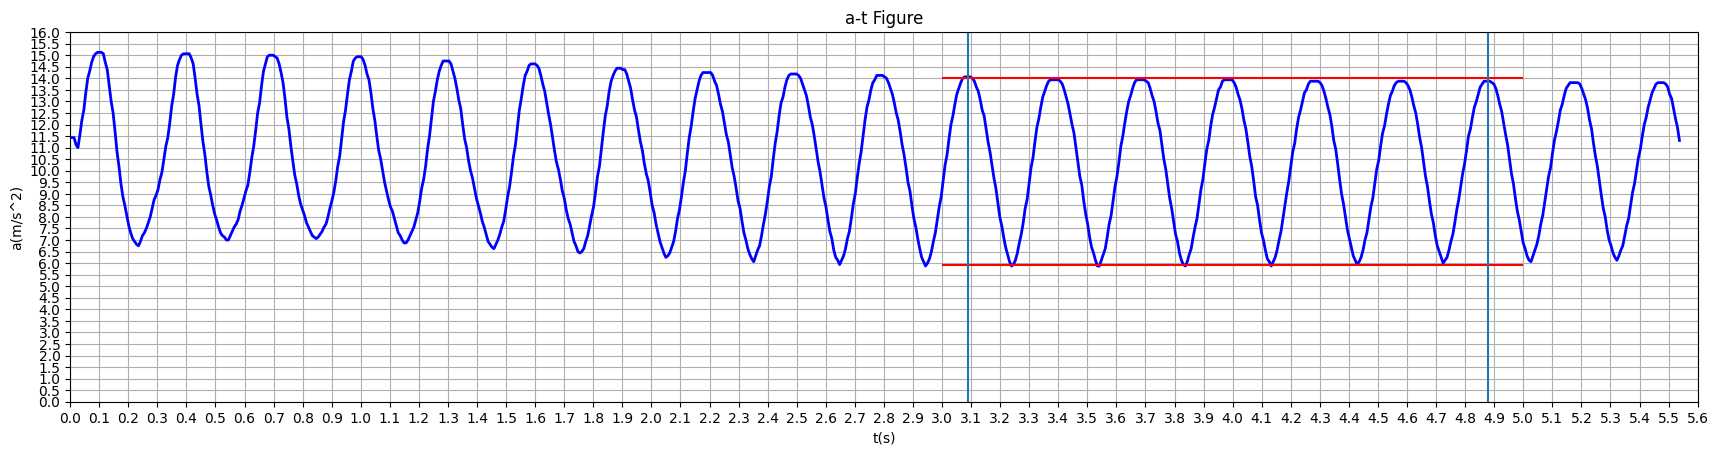

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

Img_FOLDER = 'D:/python test/img'

list_y = []

for i in range(825):
    img = cv2.imread('D:/python test/img/'+str(i+1)+'.png')
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    low_hsv = np.array([90, 50, 50])
    high_hsv = np.array([130, 255, 255])
    mask = cv2.inRange(hsv, lowerb = low_hsv, upperb = high_hsv)
    dst = cv2.GaussianBlur(mask, (3, 3), 0)
    yx = np.column_stack(np.where(mask==255))
    yx = 256-yx
    if yx.size == 0:
        continue
    y = np.max([yx[:, 0]])
    y_new = y*16/256
    list_y.append(y_new)

list_x = np.arange(0, 5.544, 0.00672)
x_major_locator = MultipleLocator(0.1)
y_major_locator = MultipleLocator(0.5)

plt.figure(figsize=(21, 4.8))
plt.plot(list_x, np.array(list_y), label='first', linewidth=2, color='b')
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)

plt.hlines(y=14, xmin=3.0, xmax=5, colors='r')
plt.hlines(y=5.9, xmin=3.0, xmax=5, colors='r')
plt.vlines(x=3.09, ymin=0, ymax=16)
plt.vlines(x=4.88, ymin=0, ymax=16)
plt.title('a-t Figure')
plt.xlabel('t(s)')
plt.ylabel('a(m/s^2)')
plt.xlim(0, 5.6)
plt.ylim(0, 16)
plt.grid()
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()


### 取穩定震盪下的時間區間(3.0-5.0)，搭配看圖並計算波峰時的時間

In [4]:
for x in list_x:
    if (x>3.0 and x<5.0):
        y_value = list_y[list(list_x).index(x)]
        if y_value>13.8:
            print(y_value, x)


13.8125 3.06432
14.0 3.07104
14.0625 3.07776
14.0625 3.08448
14.0625 3.0912
14.0625 3.0979200000000002
14.0 3.1046400000000003
13.875 3.1113600000000003
13.875 3.36672
13.9375 3.37344
13.9375 3.38016
13.9375 3.38688
13.9375 3.3936
13.9375 3.4003200000000002
13.875 3.4070400000000003
13.8125 3.6624000000000003
13.9375 3.66912
13.9375 3.67584
13.9375 3.68256
13.9375 3.68928
13.9375 3.696
13.875 3.7027200000000002
13.8125 3.7094400000000003
13.875 3.9648000000000003
13.9375 3.9715200000000004
13.9375 3.97824
13.9375 3.98496
13.9375 3.99168
13.9375 3.9984
13.8125 4.00512
13.875 4.2672
13.875 4.27392
13.875 4.28064
13.875 4.2873600000000005
13.875 4.29408
13.8125 4.300800000000001
13.8125 4.56288
13.875 4.5696
13.875 4.57632
13.875 4.5830400000000004
13.875 4.58976
13.8125 4.596480000000001
13.875 4.86528
13.875 4.872
13.875 4.87872
13.875 4.88544
13.8125 4.8921600000000005


由上可知，3.0-5.0的第一個波峰位在 3.08448, 最後一個波峰位在4.872
兩個波峰算一個週期，所以是六個週期

In [5]:
print('週期為:', np.round((4.872-3.08448)/6, 2))

週期為: 0.3
